<a href="https://colab.research.google.com/github/macgyver121/IS_DADS/blob/main/word2vec_ws%2BSVM_rdf10_acc59.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/@bedigunjit/simple-guide-to-text-classification-nlp-using-svm-and-naive-bayes-with-python-421db3a72d34

# Install Library

In [1]:
pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 62.0 MB/s eta 0:00:00


In [2]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 23.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=f657b0767a5fafef8dc65a530f9e3fa22ec5c89d402b29b93a82e576bc42edc2
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji


In [3]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import re
import emoji

from pythainlp.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.metrics import Precision, Recall
from keras.callbacks import History

import tensorflow as tf

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt

from datetime import datetime
from keras import callbacks

import keras.backend as K

# Import file

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
# import csv file
df = pd.read_csv('/content/drive/MyDrive/wsdata_all.csv', delimiter=',')

In [30]:
df.loc[:,'text'] = df.loc[:,'text'].map(word_tokenize)

In [33]:
df.tail()

,label,text
26608,0,"[ลงมา, , ดี, เท่าเดิม, , แวะ, มาหา, เซเว่น,..."
26609,1,"[แพนด้า, ซิ่ง, , มุมมอง, แตกต่าง, ลงตัว, สไตล..."
26610,0,[ดอม]
26611,1,"[เจมส์, , บอนด์, , ขับ, โตโยต้า, อัลติส, , ..."
26612,1,"[สิ, , บาร์, บี, ก้อน]"


# Load Word2Vec(TNCc5model)

In [9]:
# load pretrained model
model = Word2Vec.load("http://www.arts.chula.ac.th/ling/wp-content/uploads/TNCc5model.bin") 

In [10]:
model.wv['ลุง']

array([ 3.070527  ,  0.18736465, -1.5764655 ,  2.241788  ,  0.43824068,
       -0.87465227, -0.7722275 ,  1.9654195 , -0.43167496, -1.4505666 ,
        1.3940482 ,  0.4560658 ,  0.45843145, -0.07568713, -0.75192523,
       -1.356236  , -1.0442775 ,  1.0418516 , -0.70091647,  2.8195927 ,
        0.8817045 ,  1.0285571 ,  1.2320664 , -1.67092   , -1.0690225 ,
        2.4106567 ,  1.292201  , -1.3555707 ,  0.60082823, -0.11551253,
        0.07939093,  0.5320371 ,  3.4767208 , -1.0047841 , -1.3386122 ,
       -1.7414153 , -0.6018563 , -3.094479  ,  1.7858883 , -0.2012835 ,
        0.9770544 ,  0.43677285,  2.5374718 , -0.08855058,  1.4834609 ,
        1.3691067 , -0.03194451,  0.72896075,  1.0513773 , -0.6755366 ,
        0.8462946 ,  1.7215761 , -0.70261467,  0.04218017,  1.1874788 ,
        1.49271   , -0.7328836 ,  0.6872654 , -0.15794674, -0.6182871 ,
       -0.64685875, -1.7562376 , -0.52613497, -0.546221  ,  1.0374576 ,
        1.8402972 ,  2.6733527 , -1.3647726 ,  2.7549903 , -3.39

# Create + Spliting X and y

In [35]:
sent = [row for row in df['text']]

In [ ]:
len(sent)

In [36]:
X = []
for sentence in sent:
    vec = np.zeros(100)
    count = 0
    for word in sentence:
        try:
            vec += model.wv[word]
            count += 1
        except:
            pass
    vec = vec / count
    X.append(vec)

<ipython-input-36-518b6334eb40>:11: RuntimeWarning: invalid value encountered in true_divide
  vec = vec / count


In [37]:
X = np.nan_to_num(X, nan=0)
print(X[0])

[ 0.89701186  0.73629168  0.67612814  0.61542869  0.07323498 -0.35666739
  0.15317668 -0.03999592  0.03703002  0.45454139  0.01282204 -0.16226777
 -0.78102213  0.90452869 -0.47573043 -0.56074283  0.18303229  0.92394111
  0.5628203   0.65612088  1.13639178 -0.27528739 -0.40158584  0.92824789
  0.4215039   0.02388979  0.86747919  0.16256759  0.33500436  0.10713223
  0.0946026   0.82279864  0.58439785  0.27567702 -0.6542811  -0.34895929
  0.2269347  -0.99484988  1.04436057 -1.38578705 -0.07191552 -0.66547536
  0.91532454 -0.9349657  -0.12660856 -0.39684026 -0.01168732 -0.54812
 -0.34541218 -0.31824503 -0.3428768  -0.1673308   0.01298566 -0.38852091
 -0.10966149  0.46099247  0.26115559  0.63697626 -0.36193387 -0.18311067
 -0.64584108 -1.07534006 -0.73517254  0.26500047  0.95850931  0.3816754
 -0.04817604  0.22987081  0.35310159 -1.19473947  0.04578714  0.16596784
  0.34267256  0.28407531  0.02340286 -0.41389769 -0.12684927  0.71115071
  0.14780127  0.09524893 -0.08063832  0.87506362  0.036

In [40]:
# create y
y = df['label']
y.shape

(26613,)

In [45]:
# check class distribution
df['label'].value_counts(normalize = True)

1    0.566490
2    0.255627
0    0.177883
Name: label, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Apply SMOTE to the training data
smote = SMOTE()
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train, y_train)

In [43]:
print('Train Set ->', X_train_oversampled.shape, y_train_oversampled.shape)
print('Test Set ->', X_test.shape, y_test.shape)

Train Set -> (36321, 100) (36321,)
Test Set -> (5323, 100) (5323,)


# Train Model

In [46]:
import gensim
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import metrics

In [47]:
start_time = datetime.now()

svm = SVC(kernel='rbf', C=10, random_state=42)
svm.fit(X_train_oversampled, y_train_oversampled)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:06:20.405395


In [48]:
y_pred = svm.predict(X_test)

In [49]:
def f1_score(precision, recall):
    ''' Function to calculate f1 score '''
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [50]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print('Accuracy:', accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score(precision, recall))

Accuracy: 0.5917715573924479
Precision: 0.6250405709868724
Recall: 0.5917715573924479
F1-score: 0.607951208082472


In [51]:
# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.340     0.514     0.409       908
           1      0.724     0.614     0.664      2969
           2      0.600     0.595     0.598      1446

    accuracy                          0.592      5323
   macro avg      0.555     0.574     0.557      5323
weighted avg      0.625     0.592     0.603      5323



using the precision_score or recall_score functions from scikit-learn with the average='binary' parameter, but the target variable has more than two classes. To fix this, you can use one of the other available average options:

- average=None: Returns the precision or recall for each class separately.
- average='micro': Calculates the precision or recall globally by counting the total true positives, false negatives, and false positives across all classes.
- average='macro': Calculates the precision or recall for each class separately and then takes the unweighted mean across all classes.
- average='weighted': Calculates the precision or recall for each class separately and then takes the weighted mean across all classes, weighted by the number of samples in each class.

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[235 176  61]
 [349 916 243]
 [ 80 197 405]]


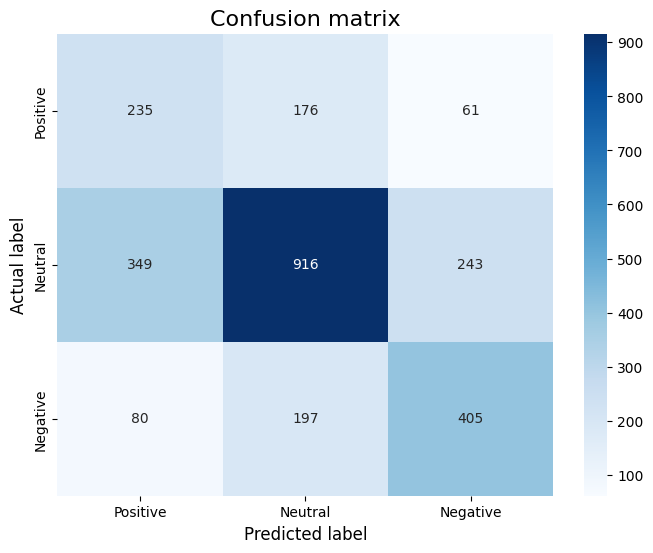

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(svm, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Positive', 'Neutral', 'Negative']
    # use model to do the prediction
    y_pred = svm.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)
    
plot_confusion_matrix(svm, X_test, y_test)

In [27]:
input = ['คคค', 'ชอบ', 'สวัสดีวันจันทร์']

In [28]:
X_new = []
for sentence in input:
    vec = np.zeros(100)
    count = 0
    for word in sentence:
        try:
            vec += model.wv[word]
            count += 1
        except:
            pass
    vec = vec / count
    X_new.append(vec)
X_new = np.nan_to_num(X_new, nan=0)
y_new = svm.predict(X_new)
print(y_new)

[2 1 0]
